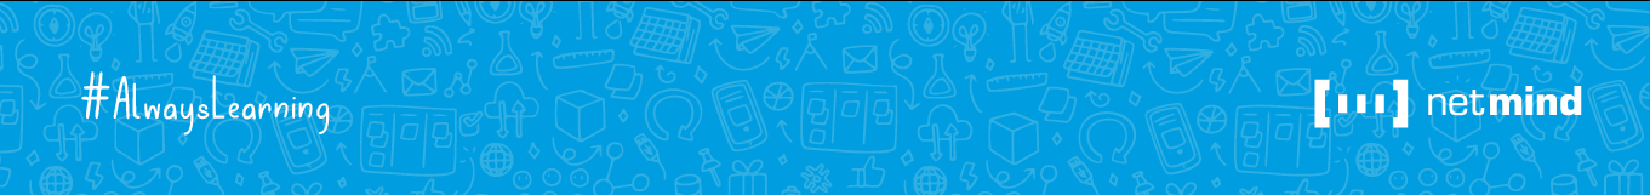

# Cómo analizar y sacar conclusiones de gráficos pandas

Analizar gráficos en **pandas** es fundamental para entender la distribución de los datos, detectar patrones y sacar conclusiones significativas. 

A continuación se presenta una guía según el tipo de gráfico y qué analizar en cada caso:  

## **Histogramas (`df.hist()` o `sns.histplot()`)**  
📌 **Útil para:** Analizar la distribución de una variable numérica.  

### **¿Qué observar?**  
✅ **Simetría:** Si la distribución es normal o sesgada.  
✅ **Valores atípicos:** Picos extremos en los extremos del gráfico.  
✅ **Multimodalidad:** Si hay más de un pico, podría indicar la presencia de subgrupos.  

🔍 **Ejemplo de interpretación:**  
Si un histograma de ingresos muestra una distribución sesgada a la derecha, indica que hay pocos valores muy altos y muchos valores bajos.  

## **Boxplots (`df.boxplot()` o `sns.boxplot()`)**  
📌 **Útil para:** Detectar valores atípicos y analizar la dispersión de una variable.  

### **¿Qué observar?**  
✅ **Rango intercuartil (IQR):** Diferencia entre el Q1 (25%) y Q3 (75%).  
✅ **Outliers:** Puntos fuera de los bigotes del diagrama.  
✅ **Mediana vs. distribución:** Si la mediana está más cerca de un cuartil, la distribución es asimétrica.  

🔍 **Ejemplo de interpretación:**  
Si un **boxplot de precios de viviendas** muestra muchos valores atípicos en el extremo superior, indica que hay casas extremadamente caras que podrían influir en la media.  

## **Gráficos de dispersión (`df.plot.scatter()` o `sns.scatterplot()`)**  
📌 **Útil para:** Analizar la relación entre dos variables numéricas.  

### **¿Qué observar?**  
✅ **Correlación:** Si los puntos siguen un patrón lineal (positivo o negativo).  
✅ **Agrupaciones:** Presencia de clústeres o subgrupos.  
✅ **Valores atípicos:** Puntos muy alejados de la tendencia general.  

🔍 **Ejemplo de interpretación:**  
Si en un gráfico de **ventas vs. inversión en publicidad** los puntos forman una línea ascendente, indica que **mayor inversión en publicidad aumenta las ventas** (correlación positiva).  

## **Gráficos de barras (`df.plot.bar()` o `sns.barplot()`)**  
📌 **Útil para:** Comparar valores categóricos.  

### **¿Qué observar?**  
✅ **Diferencias en alturas:** Indica qué categoría tiene mayor o menor valor.  
✅ **Variabilidad:** Si hay poca diferencia entre barras, la variable podría no ser relevante.  
✅ **Tendencias:** Ordenar las barras puede ayudar a identificar patrones.  

🔍 **Ejemplo de interpretación:**  
Si en un **barplot de satisfacción por tiendas**, una sucursal tiene una puntuación muy baja, podría indicar problemas en su servicio.  

## **Heatmaps (`sns.heatmap()`)**  
📌 **Útil para:** Analizar correlaciones entre variables numéricas.  

### **¿Qué observar?**  
✅ **Valores altos (cercanos a 1 o -1):** Indican fuerte correlación positiva o negativa.  
✅ **Valores cercanos a 0:** Indican que no hay relación significativa.  
✅ **Patrones diagonales:** Normalmente aparecen cuando se compara una variable consigo misma.  

🔍 **Ejemplo de interpretación:**  
Si un **heatmap de correlación** muestra que "Horas de estudio" y "Nota del examen" tienen una correlación de **0.85**, sugiere que **estudiar más mejora el rendimiento**.  

### 🔥onsejos finales para sacar conclusiones**  
✅ **Siempre combina gráficos con estadísticas:** Un gráfico puede sugerir una tendencia, pero confirma con números.  
✅ **Compara diferentes gráficos:** Usa varios tipos para obtener una visión completa.  
✅ **Cuidado con los outliers:** Pueden distorsionar la interpretación.  
✅ **Atento a sesgos:** La escala de los ejes o la selección de datos puede influir en la percepción.  

## Algunos ejemplos

### **Histogramas – Analizando la distribución de una variable**
📌 **Ejemplo:** Analizamos la distribución de precios de viviendas.

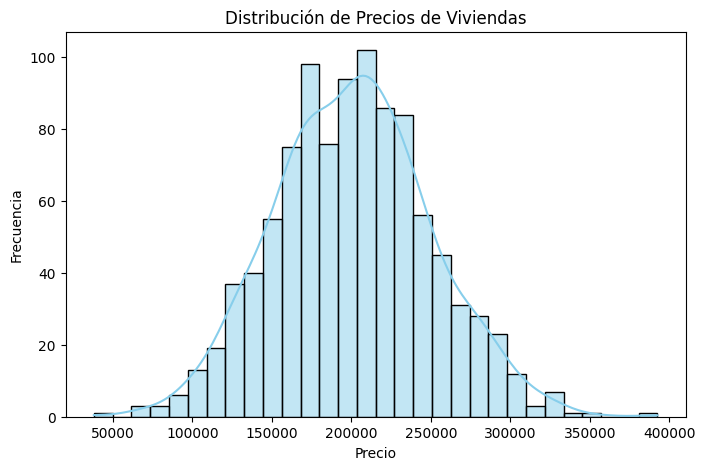

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Simulación de datos de precios de viviendas
np.random.seed(42)
precios = np.random.normal(loc=200000, scale=50000, size=1000)  # Media 200k, Desviación 50k

# Crear DataFrame
df = pd.DataFrame({'Precios': precios})

# Graficar histograma
plt.figure(figsize=(8,5))
sns.histplot(df['Precios'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Precios de Viviendas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

### 🔍 **Conclusión:**  
- La **curva KDE (línea azul)** nos muestra que la mayoría de los precios están entre **150k y 250k**.  
- Hay **cola a la derecha**, lo que indica que existen algunas viviendas muy caras que pueden ser outliers.  
- La distribución es **aproximadamente normal** pero ligeramente sesgada a la derecha.  

### **Boxplots – Detectando valores atípicos**  
📌 **Ejemplo:** Analizamos la dispersión de los salarios en tres departamentos.  

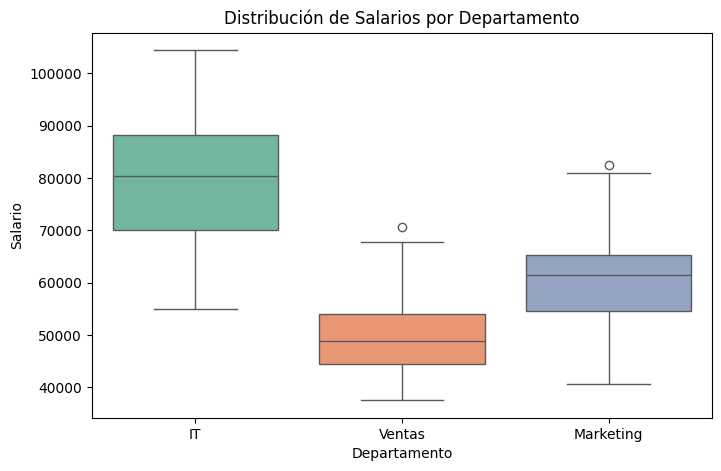

In [3]:
import warnings
warnings.filterwarnings('ignore')


# Simulación de datos de salarios por departamento
salarios = {
    'Departamento': ['IT'] * 50 + ['Ventas'] * 50 + ['Marketing'] * 50,
    'Salario': np.concatenate([
        np.random.normal(80000, 10000, 50),  # IT
        np.random.normal(50000, 8000, 50),   # Ventas
        np.random.normal(60000, 9000, 50)    # Marketing
    ])
}

# Crear DataFrame
df_salarios = pd.DataFrame(salarios)

# Graficar boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='Departamento', y='Salario', data=df_salarios, palette="Set2")
plt.title('Distribución de Salarios por Departamento')
plt.show()

### 🔍 **Conclusión:**  
- **IT** tiene los salarios más altos, pero también más dispersión.  
- **Ventas** tiene menor salario y menos variabilidad.  
- Hay **outliers en IT y Marketing**, probablemente empleados con sueldos mucho más altos.  

### **Scatter plot – Relación entre variables**  
📌 **Ejemplo:** Analizamos la relación entre horas de estudio y nota en el examen.  

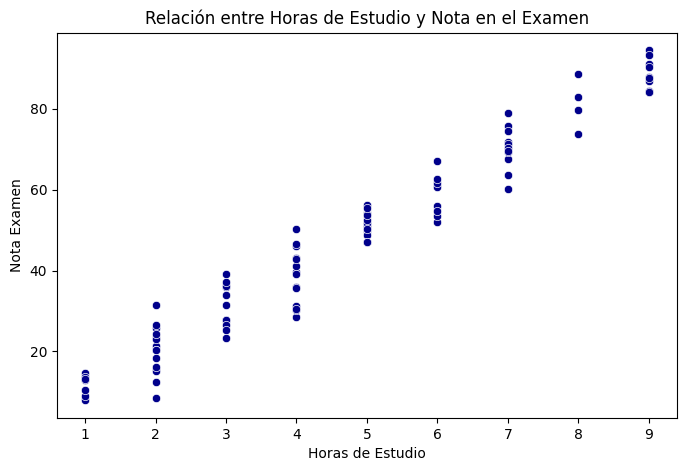

In [4]:
# Simulación de datos
horas_estudio = np.random.randint(1, 10, 100)
nota_examen = horas_estudio * 10 + np.random.normal(0, 5, 100)  # Relación positiva

# Crear DataFrame
df_estudio = pd.DataFrame({'Horas de Estudio': horas_estudio, 'Nota Examen': nota_examen})

# Graficar scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='Horas de Estudio', y='Nota Examen', data=df_estudio, color='darkblue')
plt.title('Relación entre Horas de Estudio y Nota en el Examen')
plt.show()


### 🔍 **Conclusión:**  
- **Tendencia positiva:** A mayor cantidad de horas de estudio, mejor es la nota.  
- **Dispersión:** No todas las personas con más horas de estudio tienen notas perfectas, pero la relación es clara.  
- **Pocos valores atípicos:** No hay puntos extremos que distorsionen el análisis.  

### **Heatmap – Correlación entre variables**  
📌 **Ejemplo:** Analizamos la correlación entre edad, salario y experiencia laboral.  

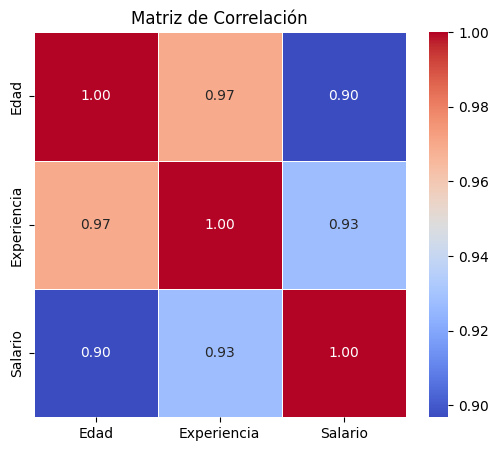

In [5]:
# Simulación de datos
edad = np.random.randint(22, 60, 100)
experiencia = edad - 20 + np.random.normal(0, 3, 100)
salario = experiencia * 2000 + np.random.normal(0, 10000, 100)

# Crear DataFrame
df_corr = pd.DataFrame({'Edad': edad, 'Experiencia': experiencia, 'Salario': salario})

# Graficar heatmap de correlaciones
plt.figure(figsize=(6,5))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### 🔍 **Conclusión:**  
- **Fuerte correlación positiva (0.9) entre experiencia y salario:** Tiene sentido, a más experiencia, mayor sueldo.  
- **Edad y salario también están relacionados, pero menos directo:** Algunas personas jóvenes pueden tener altos ingresos si tienen mucha experiencia.  
- **No hay correlaciones negativas fuertes.**  